<a href="https://colab.research.google.com/github/GyaviWalls/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Ayebare Gyavira.B

## Project Overview

**Project 1 - Part 2 (Core):**


The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

---

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about [80% of our time is spent on data preparation](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=478ec4796f63) - so this is a very important step!

---

Download the data using this link: [download the data.](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing) \(Note: [Original data source](https://https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)).
Insert code below the heading "Loading Data"
Use Pandas to read the sales prediction data set into Google Colab.
Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
Insert code below the heading "Data Cleaning"
Explore the data - what do you need to do to clean this data? Clean it!
Be sure to address each of the following tasks:

---

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Address the missing values by using a placeholder value.

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

---

Here is the Data Dictionary for this dataset:

| Variable Name | Description |
|:--------:|:--------:|
|  Item_Identifier |  Product ID   |
|  Item_Weight |  Weight of product  |
|  Item_Fat_Content	  |  Whether the product is low-fat or regular |
|  Item_Visibility	  |  The percentage of total display area of all products in a store allocated to the particular product   |
|  Item_Type |  The category to which the product belongs  |
|  Item_MRP  |  Maximum Retail Price (list price) of the product  |
|  Outlet_Identifier   |  Store ID   |
|  Outlet_Establishment_Year	  |  The year in which store was established |
|  Outlet_Size |  The size of the store in terms of ground area covered  |
|  Outlet_Location_Type |  The type of area in which the store is located   |
|  Outlet_Type |  Whether the outlet is a grocery store or some sort of supermarket  |
|  Item_Outlet_Sales |  Sales of the product in the particular store. This is the target variable to be predicted  |



# Imports

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data


In [2]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
sales_df = pd.read_csv(fpath)

sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning



1) Number of rows and columns


In [4]:
sales_df.shape

(8523, 12)

*   There are 8523 rows and 12 columns

2) Checking the datatypes of each variable



In [5]:
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

* The datatypes seem appropriate

* There appear to be some null values in features Item_Weight and Outlet_size




3) Checking and dropping duplicate values if existent

In [6]:
sales_df.duplicated().sum()

0



* since all features show 0 duplicates, we'll proceed!



4) Identifying and dropping missing values

In [7]:
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Visualising sales dataset to determine relation between the missing values

<Axes: >

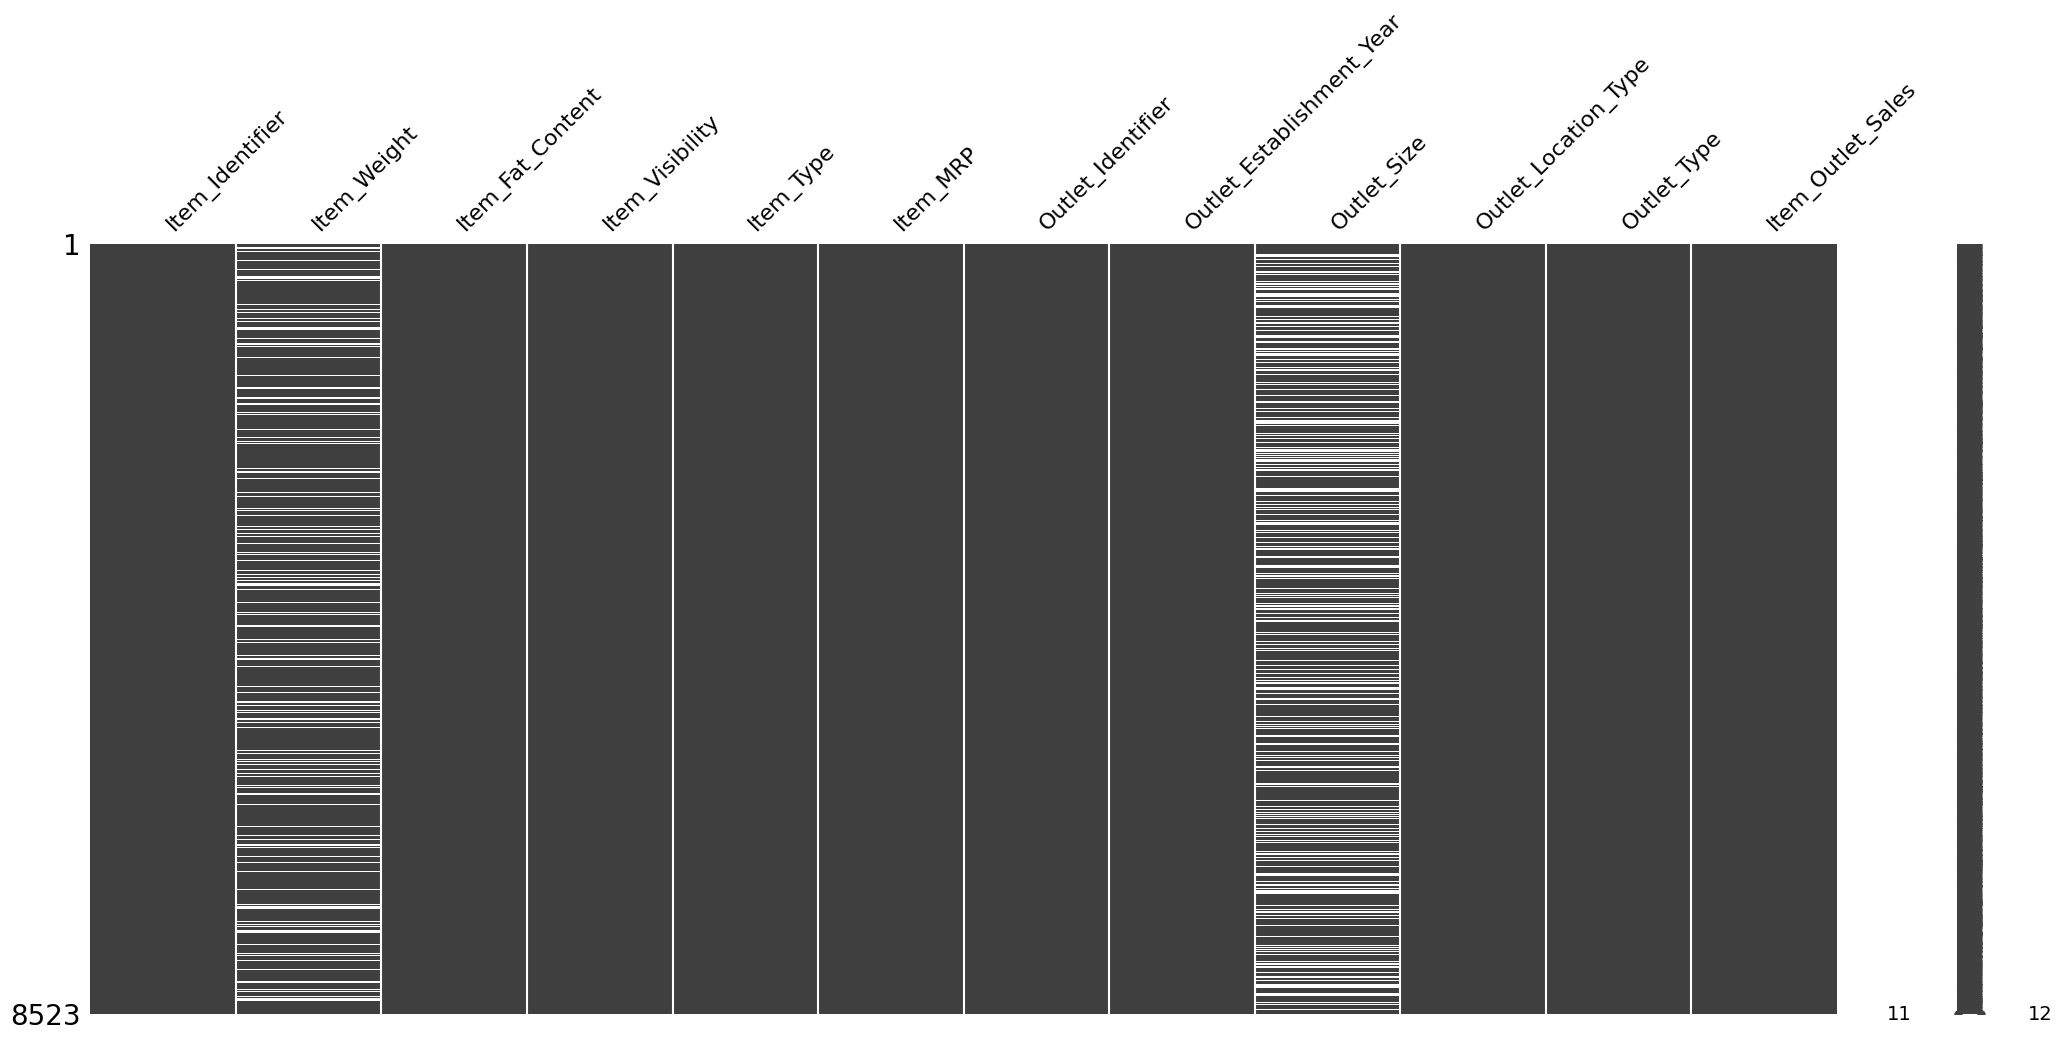

In [8]:
msno.matrix(sales_df)

*It appears random so we'll let it be!*

5) Address the missing values by using a placeholder value.

* Replacing missing values within Outlet_Size of type 'object' with 'MISSING' placeholder

In [9]:
str_cols = sales_df.select_dtypes('object').columns
sales_df[str_cols] = sales_df[str_cols].fillna('MISSING')

* Replacing missing values within Item_Weight feature of type 'float64' with '-1' placeholder

In [10]:
numeric_cols = sales_df.select_dtypes('number').columns
sales_df[numeric_cols] = sales_df[numeric_cols].fillna(-1)

6) confirming there are no missing values

In [11]:
sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) checking and fixing other data inconsistencies...




In [12]:
for col in sales_df.columns:
  print(sales_df[col].value_counts())
  print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft D

"Item_Fat_Content" has redundant values in it

In [13]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

* fixing redundancy with appropriate replacements

In [14]:
replace_dict = {'low fat': 'Low Fat',
             'reg': 'Regular',
             'LF': 'Low Fat'}

sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(replace_dict)

* confirming that the replacements have been made

In [15]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) obtaining numerical statistics for numeric features

* first obtaining all columns with numeric data

In [16]:
numeric_cols = sales_df.select_dtypes('number').columns

* displaying statistics of columns with numeric data

In [17]:
sales_df[numeric_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis


In [18]:
# %history -g


In [19]:
numer_cols = sales_df.select_dtypes('number').columns
numer_cols


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [20]:
numer_cols = numer_cols.drop('Outlet_Establishment_Year')
numer_cols


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [21]:
def plot_hist_and_box(df, col):
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
            label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
            label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'Exploratory Data Analysis for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()


def cat_plot(df, col):
  ord = df[col].value_counts().index
  ax = sns.countplot(df, x=col, order=ord)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f'Exploratory Data Analysis for {col}');



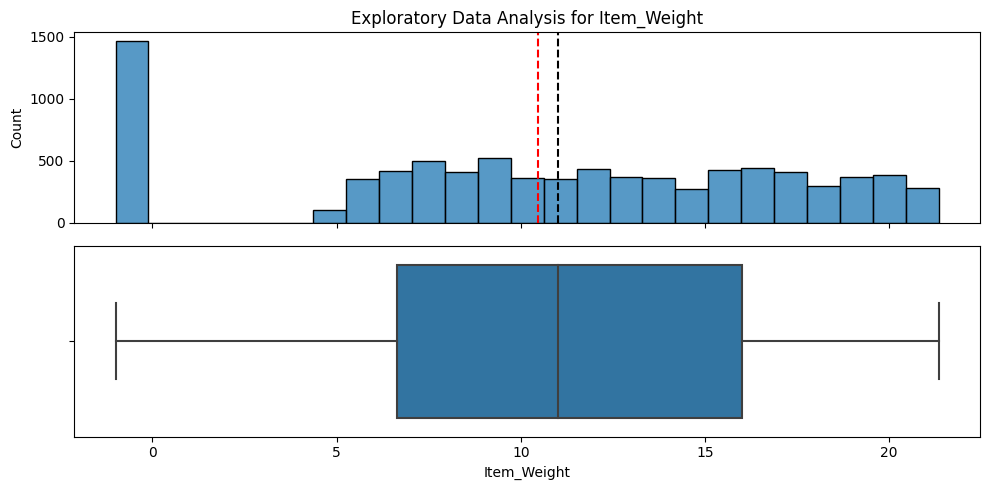

In [22]:
plot_hist_and_box(sales_df, numer_cols[0])

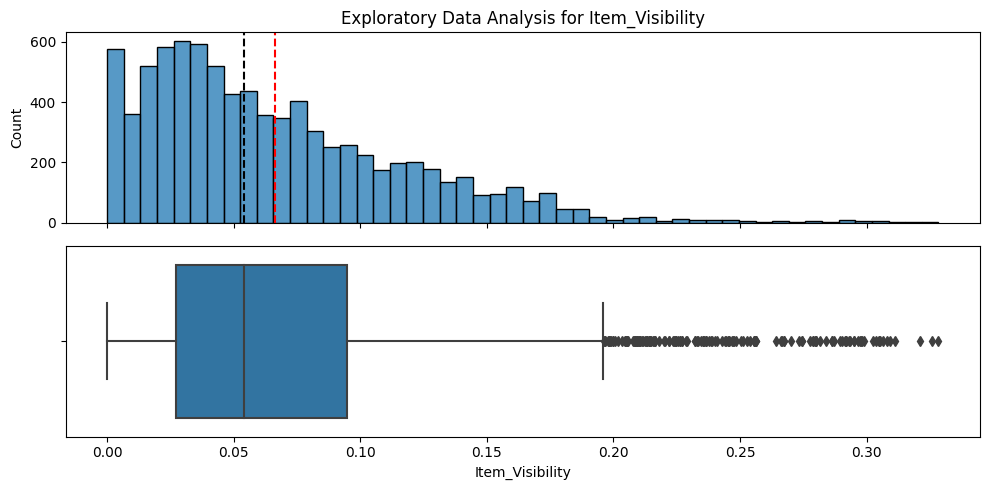

In [23]:
plot_hist_and_box(sales_df, numer_cols[1])

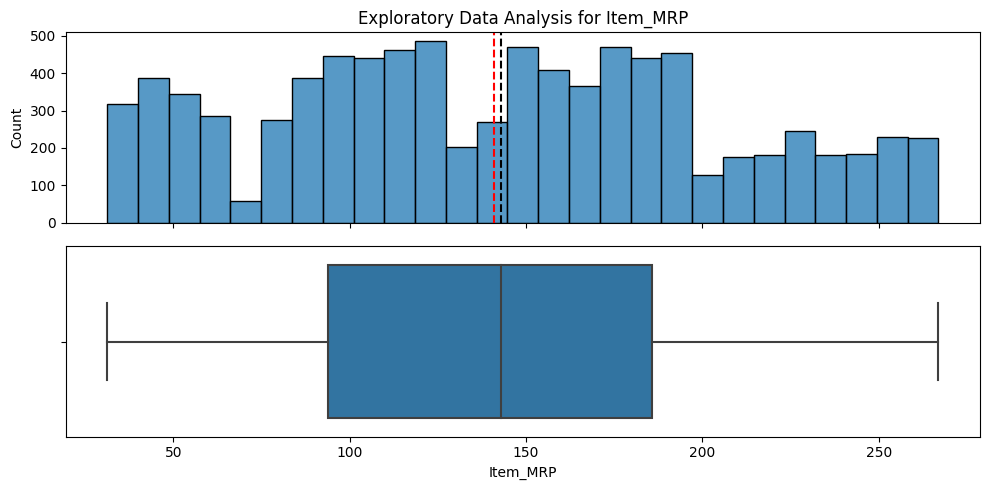

In [24]:
plot_hist_and_box(sales_df, numer_cols[2])

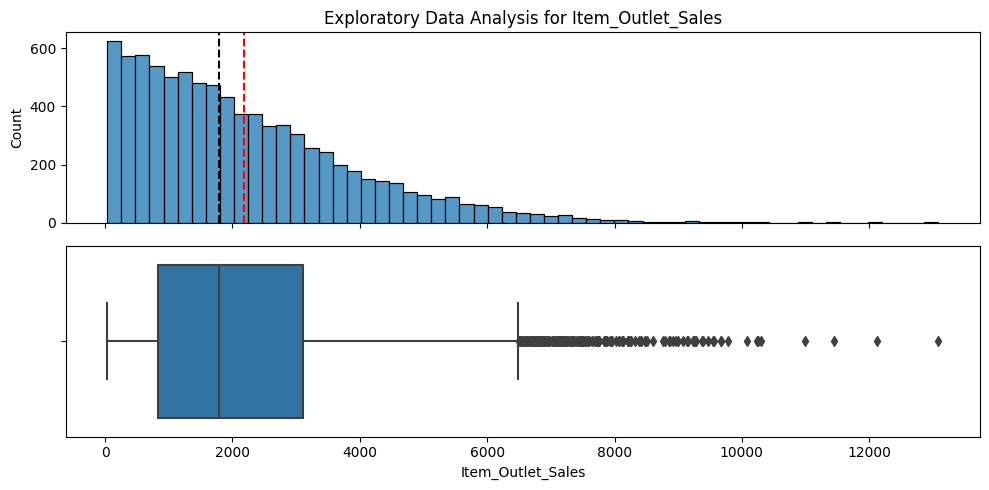

In [25]:
plot_hist_and_box(sales_df, numer_cols[3])

In [26]:
cat_cols = sales_df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [27]:
cat_cols = cat_cols.drop(['Item_Identifier', 'Outlet_Identifier'])
cat_cols


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

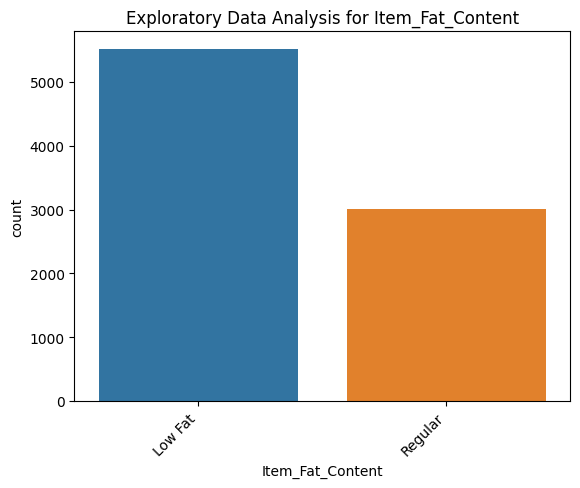

In [28]:
cat_plot(sales_df, cat_cols[0])
sales_df[cat_cols[0]].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

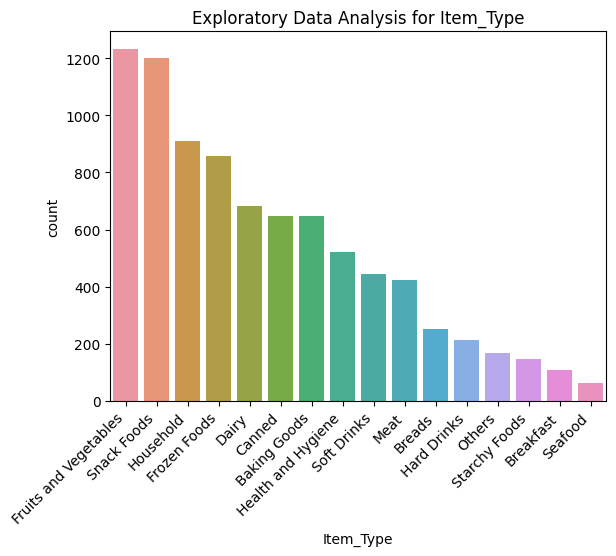

In [29]:
cat_plot(sales_df, cat_cols[1])
sales_df[cat_cols[1]].value_counts()


Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

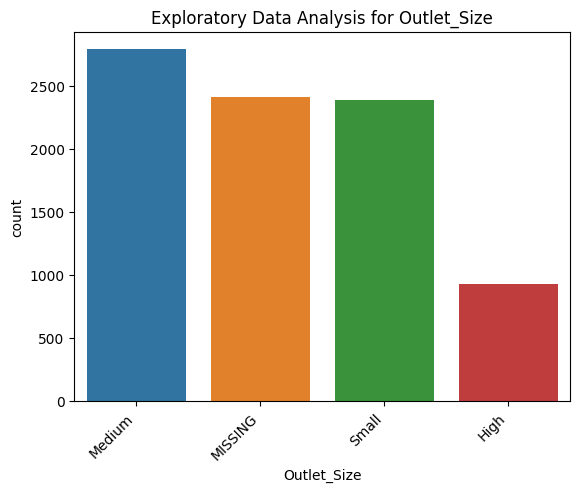

In [30]:
cat_plot(sales_df, cat_cols[2])
sales_df[cat_cols[2]].value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

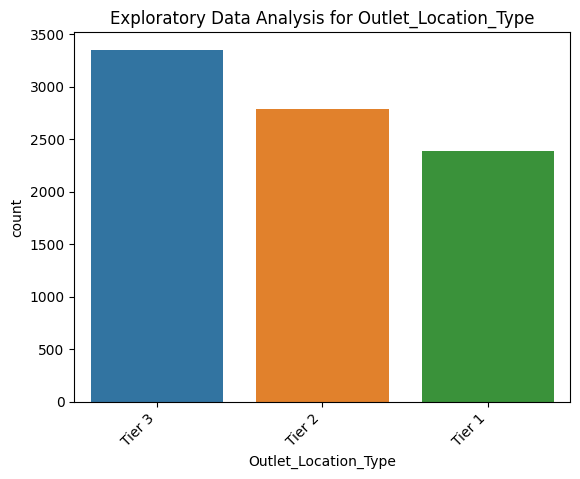

In [31]:
cat_plot(sales_df, cat_cols[3])
sales_df[cat_cols[3]].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

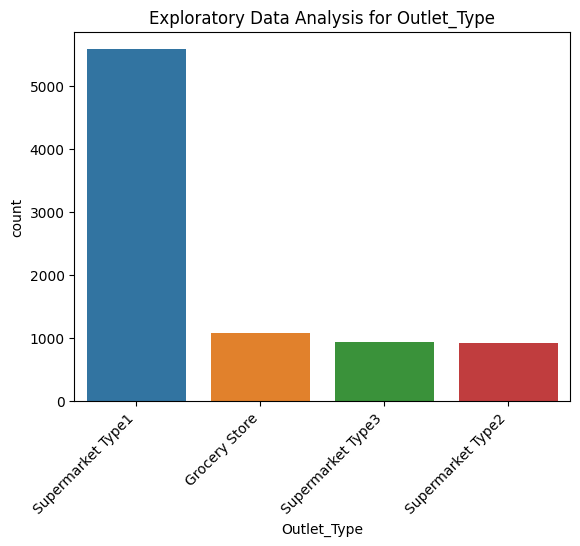

In [32]:
cat_plot(sales_df, cat_cols[4])
sales_df[cat_cols[4]].value_counts()


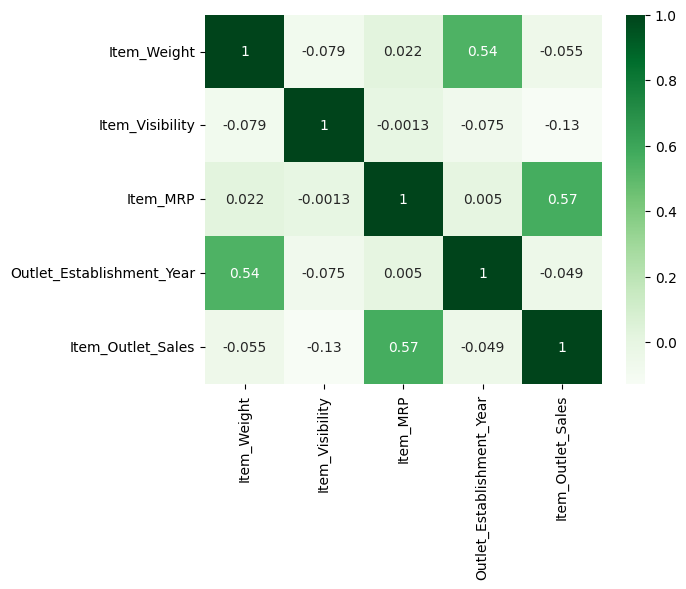

In [33]:
# plotting the heatmap for the numeric features of the dataframe
sns.heatmap(sales_df.corr(numeric_only=True), annot=True, cmap='Greens');


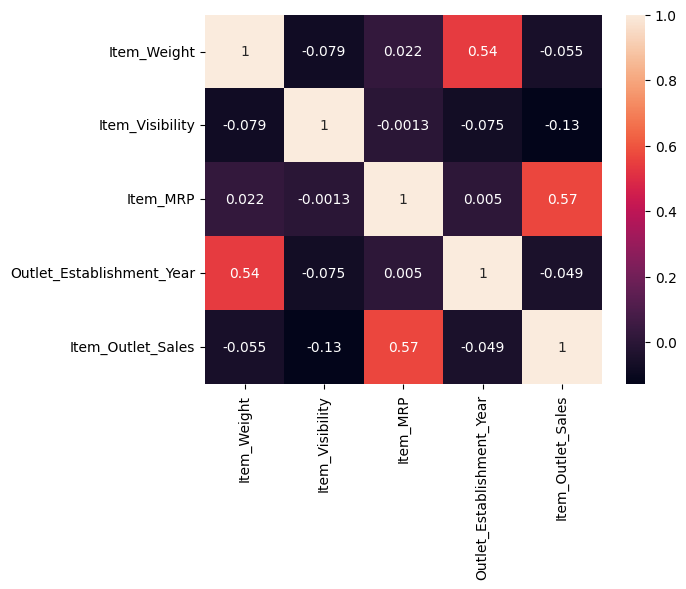

In [34]:
 sns.heatmap(sales_df.corr(numeric_only=True), annot=True);


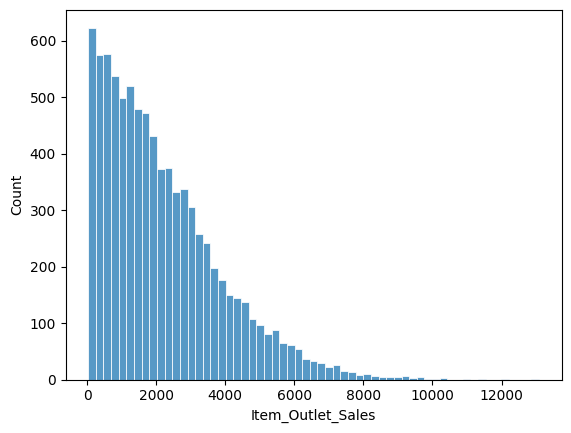

In [35]:
ax = sns.histplot(sales_df, x='Item_Outlet_Sales', edgecolor='white');


# Feature Inspection


In [43]:
!ls

drive  Prediction_of_Product_Sales.ipynb  sample_data


In [41]:
!{Prediction-of-Product-Sales}/.ipynb_checkpoints/


/bin/bash: line 1: {Prediction-of-Product-Sales}/.ipynb_checkpoints/: No such file or directory
